<a href="https://colab.research.google.com/github/Anu-George-K/RegressionModel_Algoritms/blob/main/Height_Weight_SLR_alg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/SOCR-HeightWeight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [5]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [6]:
df.tail()

,Index,Height(Inches),Weight(Pounds)
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682
24999,25000,68.87761,124.8742


In [7]:
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [8]:
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [11]:
df=df.drop(['Index'],axis=1)
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [12]:
x=df.iloc[:,:-1]
x

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [13]:
y=df.iloc[:,-1]
y

0        112.9925
1        136.4873
2        153.0269
3        142.3354
4        144.2971
           ...   
24995    118.0312
24996    120.1932
24997    118.2655
24998    132.2682
24999    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

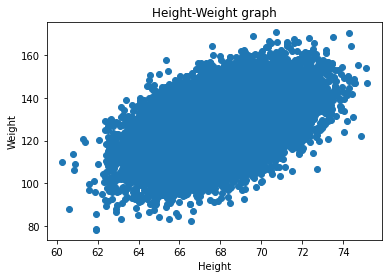

In [14]:
import matplotlib.pyplot as plt
plt.xlabel("Height")
plt.ylabel("Weight")
#to display main title
plt.title("Height-Weight graph")
plt.scatter(x,y)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

,Height(Inches)
3419,68.90463
6168,69.91649
15123,68.03928
24761,70.78151
10926,69.75493
...,...
14338,67.39555
7160,68.43382
16617,66.22404
10043,68.14281


In [16]:
#model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([119.43429393, 123.28232436, 134.46641179, ..., 127.51109139,
       120.05695337, 119.90738818])

In [17]:
y_test

24446    130.9999
1400     118.0513
3635     140.7913
4680     131.2422
4121     135.8259
           ...   
8244     142.7478
4972     132.8392
4400     139.4726
11000    123.1591
13961    121.2559
Name: Weight(Pounds), Length: 7500, dtype: float64

In [18]:
print(model.predict([[72.0]]))

[139.53989096]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


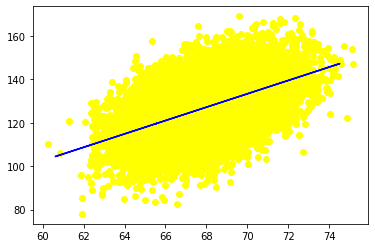

In [19]:
#create a regression line
plt.scatter(x_train,y_train,color='yellow')
plt.plot(x_test,y_pred,color='blue')


In [20]:
print("Slope is",model.coef_)

Slope is [3.08064241]


In [21]:
print("intercept is",model.intercept_)

intercept is -82.2663624184645


In [22]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
df1

,Actual_value,Predicted_value
24446,130.9999,119.434294
1400,118.0513,123.282324
3635,140.7913,134.466412
4680,131.2422,131.042031
4121,135.8259,126.584835
...,...,...
8244,142.7478,135.412385
4972,132.8392,133.076395
4400,139.4726,127.511091
11000,123.1591,120.056953


In [23]:
#MAE
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))

Mean Absolute Error is 7.9742489398456335


In [24]:
#Mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
print("Error percentage is",mean_absolute_percentage_error(y_test,y_pred))

Error percentage is 0.06407961078969074


In [25]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("Mean Squared error is",mean_squared_error(y_test,y_pred))

Mean Squared error is 100.54189085898713


In [26]:
#Root Mean Squared Error
root=mean_squared_error(y_test,y_pred)
squ=np.sqrt(root)
squ

10.027057936353371

In [27]:
#r2 score(co-effients of dertermination)

from sklearn.metrics import r2_score
print("r2 score is",r2_score(y_test,y_pred))

r2 score is 0.25621478303625245
